In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Aspirenex /spam.csv",encoding='latin-1')

In [ ]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


In [ ]:
data.columns = ['label','text']

In [ ]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isna().sum()

label    0
text     0
dtype: int64

In [ ]:
data.shape

(5572, 2)

<Axes: xlabel='label'>

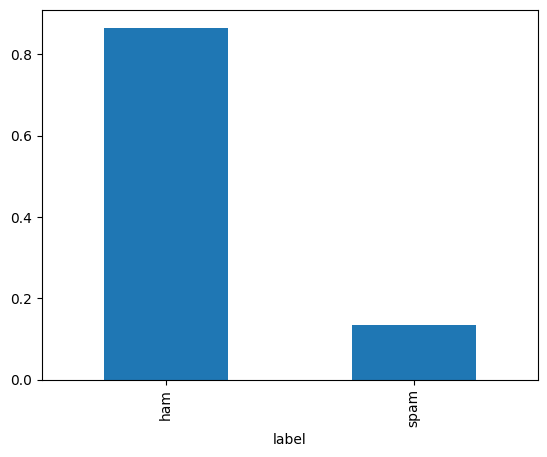

In [ ]:
data['label'].value_counts(normalize=True).plot.bar()


In [ ]:
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
#create a list text
text = list(data['text'])

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):
  r = re.sub('[^a-zA-Z]',' ',text[i])
  r = r.lower()
  r = r.split()
  r = [word for word in r if word not in stopwords.words('english')]
  r = [lemmatizer.lemmatize(word) for word in r]
  r = ' '.join(r)
  corpus.append(r)


In [ ]:
data['text'] = corpus
data.head()


,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [ ]:
x = data['text']
y = data['label']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=123)
print('Training Data :', x_train.shape)
print('Testing Data :',x_test.shape)


Training Data : (3733,)
Testing Data : (1839,)


In [ ]:
#LOGISTIC MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the training data
x_train_cv = cv.fit_transform(x_train)

lr = LogisticRegression()
lr.fit(x_train_cv,y_train)




LogisticRegression()

In [ ]:
x_test_cv = cv.transform(x_test)


In [ ]:
#generate predictions
predictions = lr.predict(x_test_cv)
predictions


array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,predictions))
cf = confusion_matrix(y_test,predictions)
cf


0.9820554649265906


array([[1600,    2],
       [  31,  206]])

<Axes: >

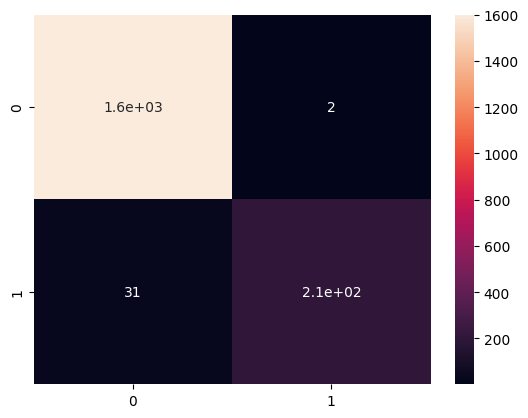

In [ ]:
import seaborn as sns
sns.heatmap(cf, annot=True)


In [ ]:
from sklearn import metrics
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df


,ham,spam
ham,1600,2
spam,31,206
